**Astroinformatica I (Semester 1 2025)**
# Tutorial Session 7: Python Astronomical Packages

*N. Hernitschek*



---
## Contents
* [Celestial Coordinates and Transformations](#first-bullet)
* [Altitude of a Target at an Observatory Site](#second-bullet)
* [Map Projections](#third-bullet)
* [Accessing Gaia Data](#fourth-bullet)
* [Best Practices](#fifth-bullet)
* [Summary](#sixth-bullet)


## 1. Celestial Coordinates <a class="anchor" id="first-bullet"></a>


`Astropy` includes a `astropy.coordinates`, framework to represent celestial coordinates and transform between them. `Astropy` supports most of the common coordinate systems (ICRS, FK4, FK5, and Galactic, AltAz) and users can define their own systems if needed. The transformation of both individual scalar coordinates and arrays of coordinates is supported.

The `astropy.coordinates` documentation can be found here:
http://docs.astropy.org/en/stable/coordinates/index.html


Coordinate objects are instantiated with a flexible and natural approach that supports both numeric angle values and (limited) string parsing.

We start by importing some general packages that we will need later on:

In [5]:

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from astropy import units as u
from astropy.coordinates import (SkyCoord, Distance, Galactic, 
                                 EarthLocation, AltAz)
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.table import QTable
from astropy.time import Time
from astropy.utils.data import download_file



The individual components of a coordinate are Angle objects, and their values are accessed using special attributes:

In [7]:
coord_1 = SkyCoord(ra=10.68458, dec=41.26917, unit=(u.degree, u.degree))

coord_2 = SkyCoord('00h42m44.3s +41d16m9s')

print(coord_1)
print(coord_2)


#print(coord_2.ra)
#print(coord_2.dec)

<SkyCoord (ICRS): (ra, dec) in deg
    (10.68458, 41.26917)>
<SkyCoord (ICRS): (ra, dec) in deg
    (10.68458333, 41.26916667)>


To **convert** to a different coordinate system, the easiest method is to use attribute-style access with short names for the built-in systems:

In [10]:
coord_1.galactic
print(coord_1.galactic)

print(coord_1)

<SkyCoord (Galactic): (l, b) in deg
    (121.17424181, -21.57288557)>
<SkyCoord (ICRS): (ra, dec) in deg
    (10.68458, 41.26917)>




The astropy.coordinates subpackage also provides a quick way to get **coordinates for named objects** (with an internet connection). All coordinate classes have a special class method, `from_name()`, that accepts a string and queries the service `Sesame` to retrieve coordinates for that object:



In [12]:
m16_coord = SkyCoord.from_name("M32") #M16

m16_coord


<SkyCoord (ICRS): (ra, dec) in deg
    (10.67427, 40.86517)>

**Exercise:** Find the coordinates of the Crab Nebula in ICRS coordinates, and convert them to Galactic Coordinates.

    
    



In the following **example**, we see a more complete application of working with coordinates, including a plot.

We load the ROSAT Point source catalog (the file is provided with the Jupyter notebook on github).
We convert all the equatorial coordinates to Galactic coordinates, and make a plot which we save.


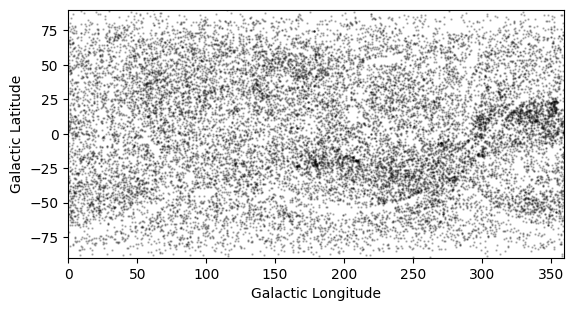

In [17]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import QTable
from matplotlib import pyplot as plt

t = QTable.read('rosat.vot', format='votable')

eq = SkyCoord(t['RAJ2000'], t['DEJ2000'])
gal = eq.galactic

fig = plt.figure()
ax = fig.add_subplot(1,1,1, aspect='equal')
ax.scatter(gal.l, gal.b, s=0.5, color='black', alpha=0.25)
ax.set_xlim(0., 360.)
ax.set_ylim(-90., 90.)
ax.set_xlabel("Galactic Longitude")
ax.set_ylabel("Galactic Latitude")

fig.savefig('coord_level2.pdf', bbox_inches='tight')



## 2. Altitude of a Target at an Observatory Site <a class="anchor" id="second-bullet"></a>

Before we have dealt with celestial coordinates of objects from a survey. This is a different use case that is realistic in the case of planning observations: We will compute the altitude (the height) of a target at a given observatory site.

When planning observations, we must know whether a given target is observable at all from a given observatory on Earth, or which objects are visible at a given time and place.


For doing so, we need to convert a coordinate or set of coordinates to a frame that is local to an on-earth observer. The most common choice for such a frame is "horizontal" or **Altitude-Azimuth** coordinates. In this frame, the sky coordinates of a source can be specified as an altitude from the horizon and an azimuth angle at a specified time. This coordinate frame is supported in `astropy.coordinates` through the `AltAz` coordinate frame.



The AltAz frame is different from the previously-demonstrated Galactic frame in that it requires additional **metadata** to define the frame instance. In order to specify an instance of the `AltAz frame, we have to (at minimum) pass in (1) a location on Earth, and (2) the time (or times) we are requesting the frame at.

In `astropy.coordinates`, we specify locations on Earth with the `EarthLocation` class. If we know the Earth longitude and latitude of our site, we can use these to create an instance of `EarthLocation` directly:


In [18]:
demo_loc = EarthLocation.from_geodetic(
    lon=-74.32834*u.deg, lat=43.05885*u.deg)


demo_loc

<EarthLocation (1260802.7459503, -4493980.25672963, 4332280.9428887) m>

The `EarthLocation` class also provides handy short-hands for retrieving an instance for a given street address (by querying the OpenStreetMap web API):

In [19]:
demo_loc = EarthLocation.of_address('Campus Coloso, Antofagasta, Chile')

demo_loc

<EarthLocation (1957887.14407803, -5505505.70062071, -2548128.18321643) m>

We can, of course, also retrieve `EarthLocation` instances for **observatories**.
For example, to retrieve an `EarthLocation` instance for the position of Kitt Peak National Observatory (in AZ, USA):


In [30]:
observing_location = EarthLocation.of_site('Kitt Peak') #Ckoirama
observing_location

<EarthLocation (-1994502.60430614, -5037538.54232911, 3358104.99690298) m>

To get a list of all available observing sites, use `EarthLocation.get_site_names()`:

In [28]:
EarthLocation.get_site_names()

['ALMA',
 'AO',
 'ARCA',
 'ASKAP',
 'ATA',
 'ATST',
 'Allen Telescope Array',
 'Anderson Mesa',
 'Anglo-Australian Observatory',
 'Apache Point',
 'Apache Point Observatory',
 'Arecibo',
 'Arecibo Observatory',
 'Astroparticle Research with Cosmics in the Abyss',
 'Atacama Large Millimeter Array',
 'Australian Square Kilometre Array Pathfinder',
 'BAO',
 'BBSO',
 'Beijing XingLong Observatory',
 'Big Bear Solar Observatory',
 'Black Moshannon Observatory',
 'CAHA',
 'CAHA',
 'CHARA',
 'CHIME',
 'Canada-France-Hawaii Telescope',
 'Canadian Hydrogen Intensity Mapping Experiment',
 'Catalina Observatory',
 'Catalina Observatory: 61 inch telescope',
 'Centro Astronomico Hispano-Aleman, Almeria',
 'Cerro Armazones Observatory',
 'Cerro Pachon',
 'Cerro Paranal',
 'Cerro Tololo',
 'Cerro Tololo Interamerican Observatory',
 'Cima Ekar 182 cm Telescope',
 'Cima Ekar Observing Station',
 'DCT',
 'DKIST',
 'DRAO',
 'DRAO 26m Telescope',
 'Daniel K. Inouye Solar Telescope',
 'Discovery Channel Te

In the following example, we will use Kitt Peak as our site.

We will compute the altitude of a few of the Milky Way open clusters from the Cantat-Gaudin et al. 2018 catalog above over the course of a night. The catalog can be found here:

https://raw.githubusercontent.com/astropy/astropy-tutorials/main/tutorials/astropy-coordinates/Cantat-Gaudin-open-clusters.ecsv
    
Please download it before proceeding.    


In [32]:
# load the catalog
tbl = QTable.read('Cantat-Gaudin-open-clusters.ecsv')


We can now pass the coordinate components to `SkyCoord` in order to create a single array-valued `SkyCoord` object to represent the positions of all of the open clusters in this catalog. Note that below we will explicitly specify the coordinate frame using `frame='icrs'`: Even though this is the default frame, it is often better to be explicit so that it is clearer to someone reading the code what the coordinate system is:


In [34]:
open_cluster_c = SkyCoord(
    ra=tbl['ra'],
    dec=tbl['dec'],
    distance=tbl['distance'],
    frame='icrs')

#get number of stars
len(open_cluster_c)

print(open_cluster_c)

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    [( 51.87 ,  34.981,  629.6), (288.399,  36.369,  382.2),
     (295.548,  27.366,  522.9), (298.306,  39.349, 1034.6),
     ( 53.056,  44.856,  787.2), (300.742,  33.528, 1598.2),
     (302.891,  37.515,  772.3), (317.933,  38.638,  528.7),
     (329.28 ,  51.558,  694.2), (340.299,  53.986,  227.7),
     (347.205,  64.974,  362. ), (349.949,  54.435,  610.6),
     ( 78.255,  44.417,  973.2), ( 81.198,   1.655,  337. ),
     ( 81.982,  -1.987,  345.2), ( 82.179,   3.527,  333.9),
     ( 95.047,  46.71 ,  580.5), (104.271,  -6.23 ,  975. ),
     (105.714, -26.512,  736.1), (116.674,   0.137,  287.3),
     (153.657, -55.001,  456.8), (185.033, -67.509, 1093.4),
     (189.281, -67.203,  607.1), (229.731, -60.798,  766.1),
     (251.853, -45.555,  801. ), (255.658, -28.421,  714.8),
     (256.886, -35.564,  815.8), (264.777, -34.874,  542.8),
     (279.263, -19.139,  535.2), (282.17 , -18.488,  286. ),
     ( 13.343,  49.536,  658.

We have an object to represent our location on Earth, so now we need to create a set of possible observing times to compute the `AltAz` frame for. `AltAz` expects time information to be passed in as an `astropy.time.Time` object. Let's pretend we have an observing run coming up on Dec 18, 2024, and we would like to compute the altitude/azimuth coordinates for our open clusters over that whole night.

We use 1AM UTC = 6PM local time (AZ mountain time), roughly the start of a night:

In [37]:
observing_date = Time('2024-12-18 1:00')


# Compute the alt/az over a 14 hour period, starting at 6PM local time,
# with 256 equally spaced time points:
time_grid = observing_date + np.linspace(0, 14, 256) * u.hour

print(time_grid)
len(time_grid)

['2024-12-18 01:00:00.000' '2024-12-18 01:03:17.647'
 '2024-12-18 01:06:35.294' '2024-12-18 01:09:52.941'
 '2024-12-18 01:13:10.588' '2024-12-18 01:16:28.235'
 '2024-12-18 01:19:45.882' '2024-12-18 01:23:03.529'
 '2024-12-18 01:26:21.176' '2024-12-18 01:29:38.824'
 '2024-12-18 01:32:56.471' '2024-12-18 01:36:14.118'
 '2024-12-18 01:39:31.765' '2024-12-18 01:42:49.412'
 '2024-12-18 01:46:07.059' '2024-12-18 01:49:24.706'
 '2024-12-18 01:52:42.353' '2024-12-18 01:56:00.000'
 '2024-12-18 01:59:17.647' '2024-12-18 02:02:35.294'
 '2024-12-18 02:05:52.941' '2024-12-18 02:09:10.588'
 '2024-12-18 02:12:28.235' '2024-12-18 02:15:45.882'
 '2024-12-18 02:19:03.529' '2024-12-18 02:22:21.176'
 '2024-12-18 02:25:38.824' '2024-12-18 02:28:56.471'
 '2024-12-18 02:32:14.118' '2024-12-18 02:35:31.765'
 '2024-12-18 02:38:49.412' '2024-12-18 02:42:07.059'
 '2024-12-18 02:45:24.706' '2024-12-18 02:48:42.353'
 '2024-12-18 02:52:00.000' '2024-12-18 02:55:17.647'
 '2024-12-18 02:58:35.294' '2024-12-18 03:01:5

256

Now we use our location, `observing_location`, and this grid of times, `time_grid`, to create an `AltAz` frame object.

**Note:** This frame accepts even more parameters about the atmosphere, which can be used to correct for atmospheric refraction. Despite they can be useful for real observing planning, here we leave those additional parameters set to their defaults, which ignores refraction.

In [38]:
altaz = AltAz(location=observing_location, obstime=time_grid)



Now we can transform the ICRS SkyCoord positions of the open clusters to `AltAz` to get the location of each of the clusters in the sky over Kitt Peak over a night. Let's first do this only for the first open cluster in the catalog we loaded:

In [39]:
oc_altaz = open_cluster_c[0].transform_to(altaz)
oc_altaz


<SkyCoord (AltAz: obstime=['2024-12-18 01:00:00.000' '2024-12-18 01:03:17.647'
 '2024-12-18 01:06:35.294' '2024-12-18 01:09:52.941'
 '2024-12-18 01:13:10.588' '2024-12-18 01:16:28.235'
 '2024-12-18 01:19:45.882' '2024-12-18 01:23:03.529'
 '2024-12-18 01:26:21.176' '2024-12-18 01:29:38.824'
 '2024-12-18 01:32:56.471' '2024-12-18 01:36:14.118'
 '2024-12-18 01:39:31.765' '2024-12-18 01:42:49.412'
 '2024-12-18 01:46:07.059' '2024-12-18 01:49:24.706'
 '2024-12-18 01:52:42.353' '2024-12-18 01:56:00.000'
 '2024-12-18 01:59:17.647' '2024-12-18 02:02:35.294'
 '2024-12-18 02:05:52.941' '2024-12-18 02:09:10.588'
 '2024-12-18 02:12:28.235' '2024-12-18 02:15:45.882'
 '2024-12-18 02:19:03.529' '2024-12-18 02:22:21.176'
 '2024-12-18 02:25:38.824' '2024-12-18 02:28:56.471'
 '2024-12-18 02:32:14.118' '2024-12-18 02:35:31.765'
 '2024-12-18 02:38:49.412' '2024-12-18 02:42:07.059'
 '2024-12-18 02:45:24.706' '2024-12-18 02:48:42.353'
 '2024-12-18 02:52:00.000' '2024-12-18 02:55:17.647'
 '2024-12-18 02:58:3


There is a lot of information in the representation of our transformed `SkyCoord`, but note that the frame of the new object is now correctly noted as `AltAz`.
Like when transforming to Galactic coordinates above, the new `SkyCoord` object now contains the data in a new representation, so the ICRS component names `ra` and `dec` will not work on this new object. Instead, the data (the altitude and azimuth as a function of time) can be accessed with the `alt` and `az` component names. 


In the following, we plot the altitude of this open cluster over the course of the night:


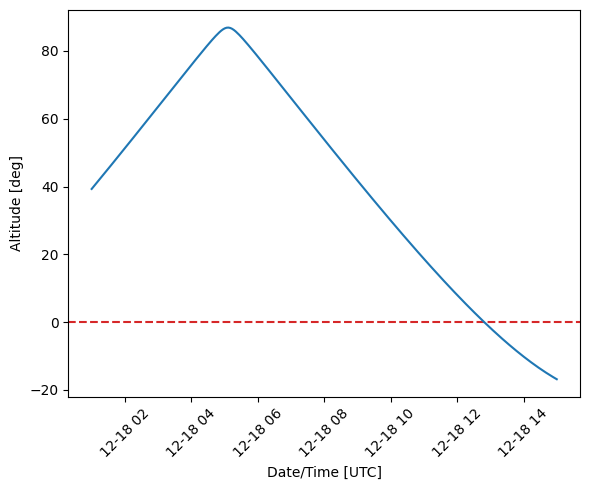

In [40]:

plt.figure(figsize=(6, 5))
plt.plot(time_grid.datetime, oc_altaz.alt.degree, marker='')
plt.axhline(0, zorder=-10, linestyle='--', color='tab:red')
plt.xlabel('Date/Time [UTC]')
plt.ylabel('Altitude [deg]')
plt.setp(plt.gca().xaxis.get_majorticklabels(), rotation=45)
plt.tight_layout()



## 3. Map Projections <a class="anchor" id="third-bullet"></a>
  
    
Let's now visualize the sky positions of all of these clusters, colored by their distances. To plot these in an all-sky spherical projection (e.g., `aitoff`or `mollweide`) using `matplotlib`, with longitude increasing to the left as is typically done for plotting astronomical objects on the sky, we have to trick matplotlib a little bit: We have to pass in the negative angle values when plotting, then reformat the tick labels to make them positive values again. We have written a short function below for that. 
Now we can plot the sky positions by passing our `SkyCoord` object in to this `coordinates_aitoff_plot()` helper function:



Text(0, 0.5, 'Dec [deg]')

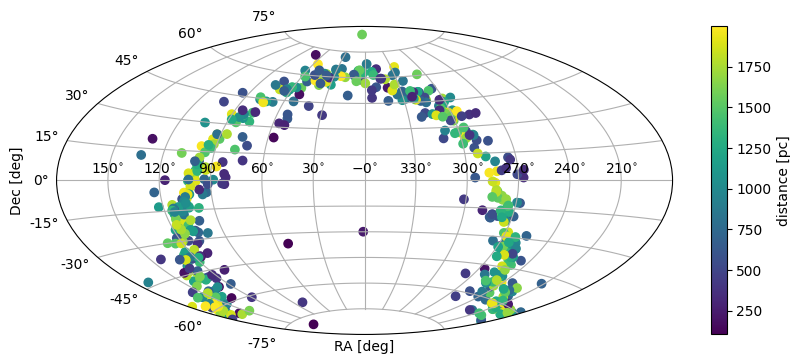

In [41]:
def coordinates_aitoff_plot(coords):
    fig, ax = plt.subplots(figsize=(10, 4), 
                           subplot_kw=dict(projection="aitoff"))
    
    sph = coords.spherical
    cs = ax.scatter(-sph.lon.wrap_at(180*u.deg).radian,
                    sph.lat.radian,
                    c=sph.distance.value)

    def fmt_func(x, pos):
        val = coord.Angle(-x*u.radian).wrap_at(360*u.deg).degree
        return f'${val:.0f}' + r'^{\circ}$'

    ticker = mpl.ticker.FuncFormatter(fmt_func)
    ax.xaxis.set_major_formatter(ticker)

    ax.grid()
    
    cb = fig.colorbar(cs)
    cb.set_label('distance [pc]')
    
    return fig, ax



fig, ax = coordinates_aitoff_plot(open_cluster_c)
ax.set_xlabel('RA [deg]')
ax.set_ylabel('Dec [deg]')

## 4. Accessing Gaia Data <a class="anchor" id="fourth-bullet"></a>

For selecting data from a database, it is necessary to compose a **query**, which is code written in a **query language**. A commonly used query language for databases is SQL (Structured Query Language). We use here ADQL which is a dialect of SQL. ADQL stands for "Astronomical Data Query Language".

The reference manual for ADQL is here:
http://www.ivoa.net/documents/ADQL/20180112/PR-ADQL-2.1-20180112.html

An easier introduction might be this, however:
https://www.gaia.ac.uk/data/gaia-data-release-1/adql-cookbook



For accessing Gaia data, we use `astroquery`.


### Connecting to Gaia

We can connect to the Gaia database simply like this:

 

In [43]:
from astroquery.gaia import Gaia

This import statement creates a TAP+ connection; TAP stands for “Table Access Protocol”, which is a network protocol for sending queries to the database and receiving the results.

### Working with Tables

Before we start working with databases and tables, it is important to quickly clarify what a database is.

Generally, a database can be seen as a collection of data, structured into tables which have columns and rows. Tables can reference to each other, and usually they do so.


More specifically, when we are talking about ADQL or SQL:

* A database is a collection of one or more named tables.
* Each table is a 2-D array with one or more named columns of data.

In the following, we use `Gaia.load_tables` to get the names of the tables in the Gaia database. With the option `only_names=True`, it loads information about the tables, called **metadata**, not the data itself.


In [44]:
tables = Gaia.load_tables(only_names=True)

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


After loading the table information, we have to print it for which we use a `for`loop:


In [45]:
for table in tables:
    print(table.name)


external.apassdr9
external.catwise2020
external.gaiadr2_astrophysical_parameters
external.gaiadr2_geometric_distance
external.gaiaedr3_distance
external.gaiaedr3_gcns_main_1
external.gaiaedr3_gcns_rejected_1
external.gaiaedr3_spurious
external.gaia_eso_survey
external.galex_ais
external.ravedr5_com
external.ravedr5_dr5
external.ravedr5_gra
external.ravedr5_on
external.ravedr6
external.sdssdr13_photoprimary
external.skymapperdr1_master
external.skymapperdr2_master
external.tmass_xsc
external.xgboost_table1
external.xgboost_table2
gaiadr1.aux_qso_icrf2_match
gaiadr1.ext_phot_zero_point
gaiadr1.allwise_best_neighbour
gaiadr1.allwise_neighbourhood
gaiadr1.gsc23_best_neighbour
gaiadr1.gsc23_neighbourhood
gaiadr1.ppmxl_best_neighbour
gaiadr1.ppmxl_neighbourhood
gaiadr1.sdss_dr9_best_neighbour
gaiadr1.sdss_dr9_neighbourhood
gaiadr1.tmass_best_neighbour
gaiadr1.tmass_neighbourhood
gaiadr1.ucac4_best_neighbour
gaiadr1.ucac4_neighbourhood
gaiadr1.urat1_best_neighbour
gaiadr1.urat1_neighbourhood


We see that there are a lot of tables. We will not use all of them, however. 

The ones we will use in the following are:


* `gaiadr2.gaia_source`, which contains Gaia data from data release 2

* `gaiadr2.panstarrs1_original_valid`, which contains photometry data from PanSTARRS

* `gaiadr2.panstarrs1_best_neighbour`, which we will use to cross-match each star observed by Gaia with the same star observed by PanSTARRS

We can use `load_table` (note: this is different from `load_tables`) to retieve the metadata for a single table.

In [48]:
meta = Gaia.load_table('gaiadr2.gaia_source')

meta

Retrieving table 'gaiadr2.gaia_source'
TAP Table name: gaiadr2.gaiadr2.gaia_source
Description: This table has an entry for every Gaia observed source as listed in the
Main Database accumulating catalogue version from which the catalogue
release has been generated. It contains the basic source parameters,
that is only final data (no epoch data) and no spectra (neither final
nor epoch).
Num. columns: 96


We see that the result is an object of type `TapTableMeta`.
To see its actual content, the metadata, we have to use `print`:


In [49]:
print(meta)

for column in meta.columns:
    print(column.name)
    

TAP Table name: gaiadr2.gaiadr2.gaia_source
Description: This table has an entry for every Gaia observed source as listed in the
Main Database accumulating catalogue version from which the catalogue
release has been generated. It contains the basic source parameters,
that is only final data (no epoch data) and no spectra (neither final
nor epoch).
Num. columns: 96
solution_id
designation
source_id
random_index
ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_primary_flag
astrometric_weight_al
astrometric_pseudo_colour
astrometric_pseudo_colour_err

**Exercise:** Get the metadata for the other tables that we will use.


### Writing queries

What we have not done yet is actually downloading the tables. We have only downloaded metadata so far.

With tables of that size, generally not the complete table is downloaded, but the queries are used to only download the data you are interested in (instead of downloading everything and then applying some data selection).

Here is an example of an ADQL query:

In [50]:
query1 = """SELECT 
TOP 10
source_id, ra, dec, parallax 
FROM gaiadr2.gaia_source
"""

The query written as a **triple-quoted string** so we can include line breaks in the query, which makes it easier to read.

The words in uppercase are ADQL keywords:

* `SELECT` indicates that we are selecting data (as opposed to adding or modifying data).
* `TOP indicates that we only want the first 10 rows of the table, which is useful for testing a query before asking for all of the data.
* `FROM specifies which table we want data from.

The third line is a list of column names, indicating which columns we want.

In this example, the keywords are capitalized and the column names are lowercase. Despite this is a common style, it is not required as ADQL and SQL are not case-sensitive.

Also, the query is broken into multiple lines to make it more readable. This is a common style, but not required, as line breaks are not affecting the behavior of the query.


To run this query, we use the `Gaia` object, which represents our connection to the Gaia database, and invoke `launch_job`:



In [51]:
job = Gaia.launch_job(query1)
job

The result is an object that represents the job running on a Gaia server.
You can access the metadata by printing it:
    

In [52]:
print(job)

<Table length=10>
   name    dtype  unit                            description                             n_bad
--------- ------- ---- ------------------------------------------------------------------ -----
SOURCE_ID   int64      Unique source identifier (unique within a particular Data Release)     0
       ra float64  deg                                                    Right ascension     0
      dec float64  deg                                                        Declination     0
 parallax float64  mas                                                           Parallax     1
Jobid: None
Phase: COMPLETED
Owner: None
Output file: 1719422206766O-result.vot
Results: None


A comment here: Don't worry about the line `Results: None`. That does not actually mean there are no results.

However, `Phase: COMPLETED` indicates that the job is complete
    
We can get the results like this:

In [53]:
results = job.get_results()
type(results)

astropy.table.table.Table

The `type function indicates that the result is an Astropy Table.

An Astropy Table is similar to a table in an SQL database, with a few differences:

* SQL databases are stored somewhere, so they are persistent. An Astropy Table is stored in memory; it disappears when you turn off the computer (or shut down this Jupyter notebook).

* SQL databases are designed to process queries. An Astropy Table can perform some query-like operations, like selecting columns and rows. But these operations use Python syntax, not SQL.


In the following, we will display the contents of the table:




In [13]:
results

source_id,ra,dec,parallax
,deg,deg,mas
int64,float64,float64,float64
6003867407926739456,229.24758693475437,-43.16625918475101,0.05337544640744751
6003867476646222720,229.27306373437722,-43.15186079086367,--
6003862593274134272,229.3240572514041,-43.30003699919699,0.2910314419482718
6003859986228465536,227.8416395835098,-41.90818099326277,--
6003875581255862912,229.36961431833257,-43.03090376178989,-0.21654434890941276
6003855794347089280,227.8787501383429,-42.0304574241058,0.5714909134248712
6003880013661767680,229.09787222898308,-43.14185448285732,0.1649270591240445
6003864964096236160,229.38597602489725,-43.19593891106351,-0.10824132246034551


Each column has a name, units, and a data type.

For example, the units of `ra` and `dec` are degrees (`deg`), and their data type is `float64`, which is a 64-bit floating-point number, used to store measurements with a fraction part.

This information comes from the Gaia database, and has been stored in the Astropy Table by Astroquery.


The documentation of this table can be found here:
https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html
        

### Asynchronous queries

`launch_job` asks the server to run the job "synchronously", which normally means it runs immediately. But synchronous jobs are limited to 2000 rows. For queries that return more rows, you should run "asynchronously", which mean they might take longer to get started.

Often you will not be sure how many rows a query will return. Fo this, you can use the SQL command `COUNT` to find out how many rows are in the result without actually returning them.

After executing an asynchronous query, the results are stored in a file on the server where they are kept for three days (or longer with an account).


In the following, as an example we make a query similar to `query1`, but with a few modifications:

* It selects the first 3000 rows, so it is bigger than we should run synchronously.

* It selects two additional columns, `pmra` and `pmdec`, which are proper motions along the axes of ra and dec.

* A new keyword is introduced: `WHERE`.


In [54]:
query2 = """SELECT 
TOP 3000
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < 1
"""

A `WHERE` clause indicates which rows we want to select. In this example, the query selects only rows where parallax is less than 1. This has the effect of selecting stars with relatively low parallax, which are farther away. We use this clause to exclude nearby stars that are unlikely to be part of GD-1.

`WHERE` is one of the most common clauses in ADQL/SQL, and one of the most useful, because it allows us to download only the rows we need from the database.

We use then `launch_job_async` to submit the query as an asynchronous query.

In [55]:
job = Gaia.launch_job_async(query2)
job


INFO: Query finished. [astroquery.utils.tap.core]


And here are the results.

In [56]:
results = job.get_results()
results


SOURCE_ID,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
6820637387237578880,331.4234000164639,-20.23832049549925,1.1434157255291664,-8.821552609406888,0.04254746864224656
6820947655674450432,335.02040342833806,-20.46786401433627,-14.652672562320703,-4.837227792587921,0.3189137282873438
6820893917043887872,335.9658568612056,-20.649345539330394,7.98061311677462,-2.587362394700402,0.388647703950126
6820697929096653568,331.8491794883916,-19.63406075460175,2.7294065319782983,-3.884910892115643,0.9279255616000289
6820814442968903936,334.729727266797,-21.144993749916924,1.1617258376766493,-10.842252513035874,0.7111565172393282
6010773234317842432,241.3513393056155,-35.98546774283421,-4.48224318094786,-4.659796591773011,0.6301723096250524
6010807490977793152,241.59762772617967,-35.665718963233836,-4.668605155413529,-4.429250163619721,0.1015738805773478
6010780484208231424,240.85801574084533,-36.092913644483815,-1.6140164132970622,-1.1513858838191569,0.015064153670443366


You might notice that some values of parallax are negative. Negative parallaxes in Gaia are caused by errors in the observations, thus having no physical meaning. But, as can be found in the Gaia FAQ, they can be a useful diagnostic on the quality of the astrometric solution.

### Operators

Within a `WHERE` clause, you can use any of the SQL comparison operators. These are the most common ones:


`>` greater than
`<` less than
`>=` greater than or equal
`<=` less than or equal
`=` equal
`!=` or `<>` not equal

As we deal here with Python and with ADQL, it is important to notice that some operators are different. In particular, notice that the equality operator in ADQL is `=`, not `==` as in Python.

Logical operators like the above can be combined to create more complex `WHERE` clauses.

**Exercise:** Modify the previous query to select rows where `bp_rp` is between -0.75 and 2.

Background: Selecting stars with `bp-rp` less than 2 excludes many class M dwarf stars, which are low temperature, low luminosity. A star like that at the distance of GD-1 would be hard to detect, so if it is detected, it it more likely to be in the foreground.

## 5. Best Practices <a class="anchor" id="fifth-bullet"></a>


If it's not possible (or not practical) to download an entire dataset, use queries to select the data you need.

Reading the documentation and metadata is essential to make sure you understand the table structure, their content and their meaning.

Like each kind of code, queries should be developed incrementally: start with something simple, test it, and add a little bit at a time.

Always use ADQL features like TOP and COUNT to test before you run a query that might return a lot of data.

If you know your query will return fewer than 2000 rows, you can run it synchronously, which might complete faster. If it might return more than 2000 rows, you should run it asynchronously.

Despite ADQL and SQL are not case-sensitive and don't require line breaks, you should capitalize the keywords and break a query into multiple lines, both for reasons of readability.


Finally: We use here Jupyter notebooks. They are a good way for presenting, developing and testing code, but real productive code should be run as a script, not as a Jupyter notebook.




## Summary <a class="anchor" id="sixth-bullet"></a>

In this lession, we have seen how to work with coordinates, both for transforming on-sky coordinates and plotting them, as well as for observing planning.
Both aspects are especially valuable and they often even work together, e.g. for planning follow-up observations for objects already observed.


In this lession, we have also learnt how to to work with data from Gaia.

This notebook demonstrates the following steps:

* Making a connection to the Gaia server
* Exploring information about the database and the tables it contains
* Writing a query and sending it to the server
* Downloading the response from the server as an Astropy Table.

